<a href="https://colab.research.google.com/github/Adam5567/DataScience-Python-Notebooks/blob/master/Firefighter_Fatalities_in_the_US_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will take a dataset pertaining to US firefighter fatalities from 2000 to 2015. The notebook will clean the data and then showcase some analysis for others to easily understand.

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database (2).csv


In [116]:
data_full = pd.read_csv('database.csv')
data = data_full.copy()

In [117]:
data = pd.DataFrame(data)

# Looking at the cell below, we can see a column at the end named 'Unamed: 13.' This is actually the result of one row being "shifted" over.

In [118]:
#Note the column on the far right.
data.head()

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN,NaN


In [119]:
#After some searching, we find row 761, which appears to have been shifted over. We can take care of that.
data.iloc[760:764]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
760,Mark,Franklin,46,Engineer,Career,"Apr 18, 2003","Nov 30, 2003",NaN,Trauma,On-Scene Fire,Water Supply,Yes,Residential,NaN
761,Nadar,NaN,Hammett,29,Firefighter/EMT,Career,"Dec 1, 2003","Dec 1, 2003",Impact,No,Trauma,Personal Vehicle Driver/Passenger,Training,Street/Road
762,Charles,Dillon,40,Captain,Volunteer,"Dec 3, 2003","Dec 3, 2003",Impact,Trauma,Training,Vehicle Driver,No,Street/Road,NaN
763,Todd,Dicks,37,Firefighter,Volunteer,"Dec 3, 2003","Dec 3, 2003",Stress/Overexertion,Heart Attack,Response,Vehicle Passenger,Yes,Street/Road,NaN


In [120]:
#The shifted column also skews this data. We can look at it again after correcting it.
data.describe()

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
count,2005,2004,1646,1998,2002,2004,2005,1995,2002,2002,1996,2005,1800,1
unique,500,1672,75,259,9,1325,1339,14,12,7,23,3,12,1
top,Michael,Smith,54,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Stress/Overexertion,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office,Street/Road
freq,86,19,53,899,952,343,343,843,845,881,427,1354,584,1


#So first let's correct row 761. We also see that a few of the columns at the end were swithced around.

In [121]:
corrected_row = {"First Name" : "Nadar", "Last Name" : "Hammett", "Age" : "29", "Rank" : "Firefighter/EMT", "Classification" : "Career", "Date of Incident" : "Dec 1, 2003", "Date of Death" : "Dec 1, 2003",
                 "Cause Of Death" : "Impact", "Nature Of Death" : "Trauma", "Duty" : "Training", "Activity" : "Personal Vehicle Driver/Passenger", "Emergency" : "No", "Property Type" : "Street/Road"}

In [122]:
data.iloc[761] = corrected_row

In [123]:
#Checking the updated row
data.iloc[760:764]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
760,Mark,Franklin,46,Engineer,Career,"Apr 18, 2003","Nov 30, 2003",NaN,Trauma,On-Scene Fire,Water Supply,Yes,Residential,NaN
761,Nadar,Hammett,29,Firefighter/EMT,Career,"Dec 1, 2003","Dec 1, 2003",Impact,Trauma,Training,Personal Vehicle Driver/Passenger,No,Street/Road,NaN
762,Charles,Dillon,40,Captain,Volunteer,"Dec 3, 2003","Dec 3, 2003",Impact,Trauma,Training,Vehicle Driver,No,Street/Road,NaN
763,Todd,Dicks,37,Firefighter,Volunteer,"Dec 3, 2003","Dec 3, 2003",Stress/Overexertion,Heart Attack,Response,Vehicle Passenger,Yes,Street/Road,NaN


Nice! Now we can go on with the notebook. Lets start by getting rid of that last column.

In [124]:
data = data.drop('Unnamed: 13', axis = 1)

In [125]:
data.head(3)

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road


In [126]:
data.describe()

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
count,2005,2005,1646,1998,2002,2004,2005,1995,2002,2002,1996,2005,1800
unique,500,1673,74,258,8,1325,1339,13,11,6,22,2,11
top,Michael,Smith,54,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Stress/Overexertion,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office
freq,86,19,53,899,953,343,343,843,846,881,427,1354,584


In [127]:
data.isnull().sum()

First Name            0
Last Name             0
Age                 359
Rank                  7
Classification        3
Date of Incident      1
Date of Death         0
Cause Of Death       10
Nature Of Death       3
Duty                  3
Activity              9
Emergency             0
Property Type       205
dtype: int64

Now we can work on getting rid of the null values. However, we may still want the rest of that row to be included. For those rows we can simply impute our own value. Lets go through each variable and see what we can do.

The first is Age. It has a lot of null values, so we will need to decide how to best fill them. Since it is numeric, there are several ways to do this, such as imputing the median, or the mode, or simply making them "Unknown."

In [128]:
data['Age'].isna().value_counts()

False    1646
True      359
Name: Age, dtype: int64

In [129]:
data.loc[data['Age'].isnull()]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
189,Peter,Brennan,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office
190,Michael,Brennan,NaN,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office
191,Edward,D'Atri,NaN,Lieutenant,Career,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office
192,James,Corrigan,NaN,Fire Safety Director,Industrial,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office
193,Philip,Hayes,NaN,Deputy Fire Safety Director,Industrial,"Sep 11, 2001","Sep 11, 2001",Collapse,Trauma,On-Scene Fire,Search and Rescue,Yes,Store/Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,Derek,Kozorosky,NaN,Airman First Class,Career,"Feb 11, 2011","Feb 11, 2011",Vehicle Collision,Trauma,Training,Unknown,No,Store/Office
1576,Gregory,Harris,NaN,Firefigher,Career,"Apr 13, 2011","Apr 22, 2011",Other,Other,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential
1581,David,Howell,NaN,Firefighter,Volunteer,"May 22, 2011","May 22, 2011",Stress/Overexertion,Heart Attack,On-Duty,Other,No,NaN
1583,Robert,Tieche,NaN,Fire Chief,Career,"May 28, 2011","May 28, 2011",Stress/Overexertion,Heart Attack,On-Duty,Other,No,NaN


In [130]:
#For this set, I am going to simply change the NaN values to "Unknown" rather than drop all of the rows
data['Age'] = data['Age'].fillna('Unknown')

In [131]:
data['Age'].isna().value_counts()

False    2005
Name: Age, dtype: int64

Looking at Rank

In [132]:
data["Rank"].value_counts()

Firefighter                           899
Lieutenant                            178
Captain                               167
Fire Chief                             98
Assistant Chief                        33
                                     ... 
Assistant Lieutenant                    1
District Forester                       1
Seasonal Wildland Firefighter           1
Firefighter Crew Supervisor III         1
Assistant Chief of EMS/Firefighter      1
Name: Rank, Length: 258, dtype: int64

In [133]:
data["Rank"].unique()

array(['Firefighter', 'Pump Operator/Inspector', 'First Assistant Chief',
       'Captain', 'Firefighter/Trustee', 'Fire Chief',
       'Firefighter, Training Officer', 'Fire Lieutenant',
       'Firefighter-EMT', 'Sergeant', 'Incident Commander',
       'Assistant Chief', 'Private', 'Lieutenant', 'Training Officer',
       'Firefighter/Engineer', 'Administrative District Chief', 'Chief',
       'Firefighter/EMT', 'Forest Technician III',
       'Firefighter/Training Officer', 'Firefighter/Paramedic',
       'Fire Police', 'Smokejumper', 'Second Assistant Chief',
       'Pilot, Wildland', 'Fire Police Officer', 'Company Member',
       'Air Tactical Group Supv. Wildland',
       'Air Attack Pilot Wildland Contract',
       'Firefighter/Rotor Craft Pilot', 'Ambulance Captain',
       'Seasonal Wildland Firefighter', 'District Forester',
       'IFR Captain', 'Firefighter, Private', 'Inmate Firefighter',
       'Fire Crew Chief', 'Lance Corporal', 'Pilot', 'Crew Chief',
       'Firefight

The number of unique items in the rank category is an issue. For our purposes, I am going to categorize them as follows: Firefighter, Lieutenant, Captain, Chief-level Staff, Wildland Firefighter, Other

In [134]:
data['Rank'] = data['Rank'].replace(['Firefighter/EMT', 'Firefighter/Paramedic', 'Firefighter/Hazmat', 'Firefighter/Driver',   'Firefighter/Chief Engineer', 'Private', 'Sergeant', 'Firefighter/EMT-B', 'Firefighter/EMT-I'], 'Firefighter')
data['Rank'] = data['Rank'].replace(['Lieutenant/EMT', 'Lieutenant/Paramedic', 'Lieutenant/Hazmat', 'Lieutenant/Driver', 'Lieutenant/Engineer', 'Firefighter/Lieutenant', 'Lieutenant/Captain', 'Lieutenant/Battalion Chief', 'Lieutenant/Assistant Chief', 'Lieutenant/Deputy Chief', 'Lieutenant/Chief Engineer', 'Lieutenant/Chief of Department'], 'Lieutenant')
data['Rank'] = data['Rank'].replace(['Captain/EMT', 'Captain/Paramedic', 'Captain/Hazmat', 'Captain/Driver', 'Captain/Engineer', 'Captain/Battalion Chief', 'Firefighter/Captain', 'Captain/Assistant Chief', 'Captain/Deputy Chief', 'Captain/Chief Engineer'], 'Captain')
data['Rank'] = data['Rank'].replace(['Chief-level Staff', 'Chief-level Officer', 'Chief-level Administrator', 'Chief-level Executive', 'Assistant Chief', 'Acting Fire Chief', 'Firefighter/Chief', 'Firefighter/Battalion Chief', 'Firefighter/Deputy Chief', 'Firefighter/Chief of Department', 'Fire Chief', 'Firefighter/Assistant Chief', 'Captain/Chief of Department', 'Deputy Chief'], 'Chief')
data['Rank'] = data['Rank'].replace(['Wildland Firefighter/EMT', 'Wildland Firefighter/Paramedic', 'Wildland Firefighter/Hazmat', 'Wildland Firefighter/Driver', 'Wildland Firefighter/Engineer', 'Wildland Firefighter/Captain', 'Wildland Firefighter/Battalion Chief', 'Wildland Firefighter/Assistant Chief', 'Wildland Firefighter/Deputy Chief', 'Wildland Firefighter/Chief Engineer', 'Wildland Firefighter/Chief of Department'], 'Wildland Firefighter')
data['Rank'].loc[~data['Rank'].isin(['Firefighter', 'Lieutenant', 'Captain', 'Chief', 'Wildland Firefighter'])] = 'Other'
data['Rank'].value_counts()


Firefighter    972
Other          512
Lieutenant     181
Captain        170
Chief          170
Name: Rank, dtype: int64

In [135]:
data["Rank"].unique()

array(['Firefighter', 'Other', 'Captain', 'Chief', 'Lieutenant'],
      dtype=object)

In [136]:
data["Rank"].value_counts()

Firefighter    972
Other          512
Lieutenant     181
Captain        170
Chief          170
Name: Rank, dtype: int64

This will work for now, though Other has 637 items. It may be beneficial to us later to divide these out into smaller categories.

Let's remind ourselves of our data below. Next comes Classification:

In [137]:
data.head()

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property
1,Lee,Purdy,57,Other,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential
2,Ronald,Osadacz,36,Other,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN


In [138]:
#Here we can decide if we want to combine Wildland into one category.
data.Classification.value_counts()

Career                953
Volunteer             880
Wildland Full-Time     46
Wildland Contract      40
Wildland Part-Time     35
Paid-on-Call           26
Part-Time (Paid)       16
Industrial              6
Name: Classification, dtype: int64

In [139]:
#I decided to both combine the Wildland options into one category as well as combine both Paid-on-Call and Part-Time (Paid) into a new value
data['Classification'] = data['Classification'].replace(['Wildland Full-Time', 'Wildland Contract', 'Wildland Part-Time'], 'Wildland')
data['Classification'] = data['Classification'].replace(['Paid-on-Call', 'Part-Time (Paid)'], 'Paid (Not Full-Time)')
data.loc[754, 'Classification'] = 'Unknown'
data.loc[905, 'Classification'] = 'Unknown'
data.loc[1555, 'Classification'] = 'Unknown'
data.Classification.value_counts()

Career                  953
Volunteer               880
Wildland                121
Paid (Not Full-Time)     42
Industrial                6
Unknown                   3
Name: Classification, dtype: int64

Both the Date of Incident and Date of Death columns may be hard to see if any changes are needed, as here we are hoping that the dates are all entered in the same format. It may be easiest to simply parse through the data. However each column has null values to take care of.

In [140]:
#This entry has a lot of null values. Looking him up, we find out that William contracted hepatitis C while on-duty "several years" before dying in 2005.
#This will help us with a couple categories here but not all of them.
data.loc[data['Date of Incident'].isna()]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
906,William,Hudson,50,Captain,Career,NaN,"Feb 3, 2005",NaN,Other,NaN,NaN,No,NaN


In [141]:
#This is the only NA value for Date of Incident, so lets just change it to "Unknown"
#We can also help him out by filling in his missing values now instead of later
data.loc[906, 'Date of Incident'] = 'Unknown'
data.loc[906, 'Cause Of Death'] = 'Exposure' #This will change later
data.loc[906, 'Duty'] = 'Yes'
data.loc[906, 'Activity'] = 'On-Scene Emergency'
data.loc[906, 'Property Type'] = 'Unknown'
data.loc[906]

First Name                     William
Last Name                       Hudson
Age                                 50
Rank                           Captain
Classification                  Career
Date of Incident               Unknown
Date of Death              Feb 3, 2005
Cause Of Death                Exposure
Nature Of Death                  Other
Duty                               Yes
Activity            On-Scene Emergency
Emergency                           No
Property Type                  Unknown
Name: 906, dtype: object

Date of death has zero null values. We can move on assuming that each date is entered in the same format

In [142]:
data.loc[data['Date of Death'].isna()]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type


With the null values in the Cause of Death column, we can get a good guess of how they died from the Nature of Death column.

In [143]:
data.loc[data['Cause Of Death'].isna()]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
111,James,Haigler,44,Other,Career,"Jan 19, 2001","Jan 19, 2001",NaN,Heart Attack,On-Duty,Other,No,NaN
146,Ritchie,Eutsler,30,Captain,Career,"May 16, 2001","May 16, 2001",NaN,Stroke,On-Duty,In-Station Duties,No,Store/Office
148,Donald,Souza,59,Captain,Career,"Dec 23, 1995","May 30, 2001",NaN,Electrocution,On-Scene Fire,Search and Rescue,Yes,Residential
534,Linda,Hernandez,34,Firefighter,Career,"May 22, 1999","Sep 18, 2001",NaN,NaN,On-Scene Fire,Ventilation,Yes,Residential
583,Mark,Mansfield,30,Firefighter,Career,"Apr 6, 2002","Apr 6, 2002",NaN,Heart Attack,On-Duty,In-Station Duties,No,Store/Office
588,William,"Tripp, Jr.",28,Firefighter,Volunteer,"Apr 13, 2002","Apr 13, 2002",NaN,Other,On-Scene Emergency,Other,Yes,Street/Road
646,Patrick,Brooks,38,Firefighter,Career,"Nov 12, 2002","Nov 12, 2002",NaN,Heart Attack,On-Duty,Other,No,Store/Office
754,Harold,Allgood,Unknown,Other,Unknown,"Nov 15, 2003","Nov 15, 2003",NaN,NaN,NaN,NaN,No,NaN
760,Mark,Franklin,46,Other,Career,"Apr 18, 2003","Nov 30, 2003",NaN,Trauma,On-Scene Fire,Water Supply,Yes,Residential


We can impute these values in ourselves, but we want to keep it aligned with how the other values of the column are. Let's take a look.

In [144]:
data['Cause Of Death'].unique()

array(['Stress/Overexertion', 'Trapped', 'Fall', 'Impact', 'Exposure',
       'Vehicle Collision', nan, 'Other', 'Collapse', 'Assault',
       'Disorientation', 'Unknown', 'Smoke', 'Contact'], dtype=object)

In [145]:
#Lets recode these into a few less categories
data['Cause Of Death'] = data['Cause Of Death'].replace(['Fall', 'Impact', 'Vehicle Collision', 'Assault'], 'Trauma')
data['Cause Of Death'] = data['Cause Of Death'].replace(['Stress/Overexertion', 'Exposure'], 'Medical')
data['Cause Of Death'] = data['Cause Of Death'].replace(['Trapped', 'Collapse', 'Disorientation'], 'Structure-related')
data['Cause Of Death'] = data['Cause Of Death'].replace(['Contact'], 'Electrical')
data['Cause Of Death'] = data['Cause Of Death'].replace(['Other', 'Unknown'], 'Other/Unknown')

In [146]:
#Now we can impute the null values based on their Cause of Death
data.loc[111, 'Cause Of Death'] = 'Medical'
data.loc[146, 'Cause Of Death'] = 'Medical'
data.loc[148, 'Cause Of Death'] = 'Electrical'
data.loc[534, 'Cause Of Death'] = 'Structure-related'
data.loc[583, 'Cause Of Death'] = 'Medical'
data.loc[588, 'Cause Of Death'] = 'Other/Unknown'
data.loc[646, 'Cause Of Death'] = 'Medical'
data.loc[754, 'Cause Of Death'] = 'Other/Unknown'
data.loc[760, 'Cause Of Death'] = 'Trauma'

In [147]:
#Nice!
data['Cause Of Death'].value_counts()

Medical              872
Structure-related    574
Trauma               503
Other/Unknown         49
Smoke                  4
Electrical             3
Name: Cause Of Death, dtype: int64

Looking at Nature of Death. Just a few nulls be we have to do the same as above and categorize.

In [148]:
data.loc[data['Nature Of Death'].isna()]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
534,Linda,Hernandez,34,Firefighter,Career,"May 22, 1999","Sep 18, 2001",Structure-related,NaN,On-Scene Fire,Ventilation,Yes,Residential
614,Andrew,Waybright,23,Other,Career,"Jul 3, 2002","Jul 3, 2002",Medical,NaN,Training,Fitness Activity,No,Outdoor Property
754,Harold,Allgood,Unknown,Other,Unknown,"Nov 15, 2003","Nov 15, 2003",Other/Unknown,NaN,NaN,NaN,No,NaN


In [149]:
data['Nature Of Death'].unique()

array(['Stroke', 'Heart Attack', 'Suffocation', 'Trauma', 'Violence',
       'Burns', 'Other', 'Electrocution', nan, 'Drowning',
       'Heat Exhaustion', 'Unknown'], dtype=object)

In [150]:
#Now we can take care of all of this in one cell
data.loc[534, 'Nature Of Death'] = 'Medical'
data.loc[614, 'Nature Of Death'] = 'Medical'
data.loc[754, 'Nature Of Death'] = 'Other/Unknown'
data['Nature Of Death'] = data['Nature Of Death'].replace(['Stroke', 'Heart Attack', 'Heat Exhaustion', 'Suffocation'], 'Medical')
data['Nature Of Death'] = data['Nature Of Death'].replace(['Violence'], 'Trauma')
data['Nature Of Death'] = data['Nature Of Death'].replace(['Other', 'Unknown'], 'Other/Unknown')

In [151]:
data['Nature Of Death'].unique()

array(['Medical', 'Trauma', 'Burns', 'Other/Unknown', 'Electrocution',
       'Drowning'], dtype=object)

After this, Duty and Activity have a few null values each to take care of.

In [152]:
data.loc[data.Duty.isna()]

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
754,Harold,Allgood,Unknown,Other,Unknown,"Nov 15, 2003","Nov 15, 2003",Other/Unknown,Other/Unknown,NaN,NaN,No,NaN
1979,Daniel,Hampton,35,Firefighter,Paid (Not Full-Time),"Sep 18, 2015","Sep 18, 2015",Trauma,Trauma,NaN,Not on Scene,Yes,Street/Road


In [153]:
#Since this is a notebook on firefighter fatalities, each death in here will be in some way associated with being on-duty.
#This means we will have no 'No' values in this column. I will be combining very little here, mostly just renaming items so they are easier to understand.
data.Duty.unique()

array(['Response', 'On-Scene Fire', 'Training', 'On-Duty',
       'On-Scene Emergency', 'Return', nan, 'Yes'], dtype=object)

In [154]:
data['Duty'] = data['Duty'].replace(['On-Duty', 'Yes'], 'On-Duty: Other')
data['Duty'] = data['Duty'].replace(['On-Scene Fire'], 'Fire Scene')
data['Duty'] = data['Duty'].replace(['On-Scene Emergency'], 'Emergency Scene')
data['Duty'] = data['Duty'].replace(['Return'], 'Returning From Call')
data['Duty'] = data['Duty'].replace(['Response'], 'Responding To Call')

In [155]:
data['Duty'] = data['Duty'].fillna('Unknown')

In [156]:
data.Duty.unique()

array(['Responding To Call', 'Fire Scene', 'Training', 'On-Duty: Other',
       'Emergency Scene', 'Returning From Call', 'Unknown'], dtype=object)

In [157]:
#This is a lot of values, but a case can be made for most to warrant their own category. We will only combine some of them
data['Activity'].unique()

array(['Vehicle Passenger', 'Advance Hose Lines/Fire Attack', 'Other',
       'Support', 'In-Station Duties', 'Vehicle Driver',
       'Personal Vehicle Driver/Passenger', 'Ventilation',
       'Search and Rescue', 'Water Supply', 'Incident Command',
       'EMS/Patient Care', 'Fitness Activity', 'Salvage and Overhaul',
       nan, 'Standby', 'Scene Safety', 'Setup', 'Pump Operations',
       'Unknown', 'On-Scene Emergency', 'Extrication', 'Not on Scene',
       'Emergency Response'], dtype=object)

In [158]:
data['Activity'] = data['Activity'].replace(['Vehicle Passenger', 'Vehicle Driver', 'Personal Vehicle Driver/Passenger'], 'Vehicle Crash')
data['Activity'] = data['Activity'].replace(['Water Supply', 'Pump Operations'], 'Water and Pump Operations')
data['Activity'] = data['Activity'].replace(['Support', 'Other', 'Setup'], 'Other Fireground Activity')
data['Activity'] = data['Activity'].replace(['On-Scene Emergency', 'EMS/Patient Care'], 'Other Emergency')
data['Activity'] = data['Activity'].replace(['Vehicle Passenger', 'Vehicle Driver', 'Personal Vehicle Driver/Passenger'], 'In Vehicle')
data['Activity'] = data['Activity'].replace(['Advance Hose Lines/Fire Attack'], 'Fire Attack')
data['Activity'] = data['Activity'].replace(['Not on Scene', 'Fitness Activity', 'In-Station Duties'], 'Other Firefighter Duties')
data['Activity'] = data['Activity'].fillna('Unknown')

In [159]:
data['Activity'].unique()

array(['Vehicle Crash', 'Fire Attack', 'Other Fireground Activity',
       'Other Firefighter Duties', 'Ventilation', 'Search and Rescue',
       'Water and Pump Operations', 'Incident Command', 'Other Emergency',
       'Salvage and Overhaul', 'Unknown', 'Standby', 'Scene Safety',
       'Extrication', 'Emergency Response'], dtype=object)

The last column, Property Type, has 205 null values. In the essence of time it is best to simply change these to type Other

In [160]:
data['Property Type'].unique()

array(['Outdoor Property', 'Residential', 'Street/Road', nan,
       'Store/Office', 'Public Assembly', 'Vacant Property',
       'Manufacturing', 'Institutional', 'Storage', 'Industrial',
       'Educational', 'Unknown'], dtype=object)

In [161]:
data['Property Type'] = data['Property Type'].fillna('Unknown')

I am keeping the rest of these values as-is, as each has its own fireground considerations, hazards, and priorities.

In [162]:
data['Property Type'].unique()

array(['Outdoor Property', 'Residential', 'Street/Road', 'Unknown',
       'Store/Office', 'Public Assembly', 'Vacant Property',
       'Manufacturing', 'Institutional', 'Storage', 'Industrial',
       'Educational'], dtype=object)

#Now that our data is cleaned, we can begin our EDA!

In [163]:
data.describe()

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
count,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
unique,500,1673,75,5,6,1326,1339,6,6,7,15,2,12
top,Michael,Smith,Unknown,Firefighter,Career,"Sep 11, 2001","Sep 11, 2001",Medical,Medical,Fire Scene,Other Fireground Activity,Yes,Store/Office
freq,86,19,359,972,953,343,343,872,985,881,453,1354,584


In [164]:
data.isnull().sum()

First Name          0
Last Name           0
Age                 0
Rank                0
Classification      0
Date of Incident    0
Date of Death       0
Cause Of Death      0
Nature Of Death     0
Duty                0
Activity            0
Emergency           0
Property Type       0
dtype: int64

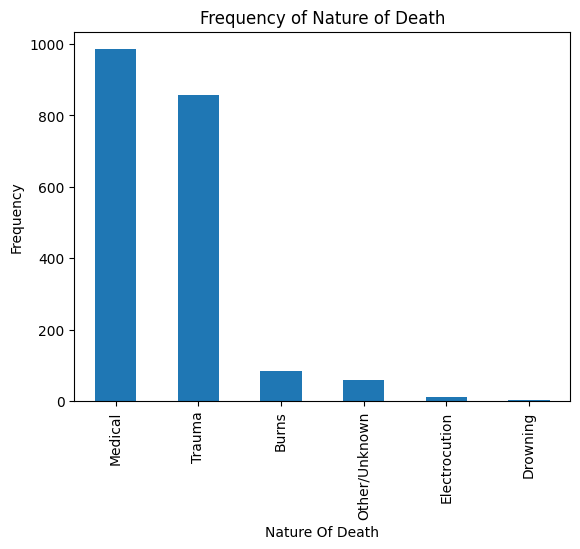

In [165]:
data["Nature Of Death"].value_counts().plot(kind='bar')
plt.xlabel("Nature Of Death")
plt.ylabel("Frequency")
plt.title("Frequency of Nature of Death")
plt.show()


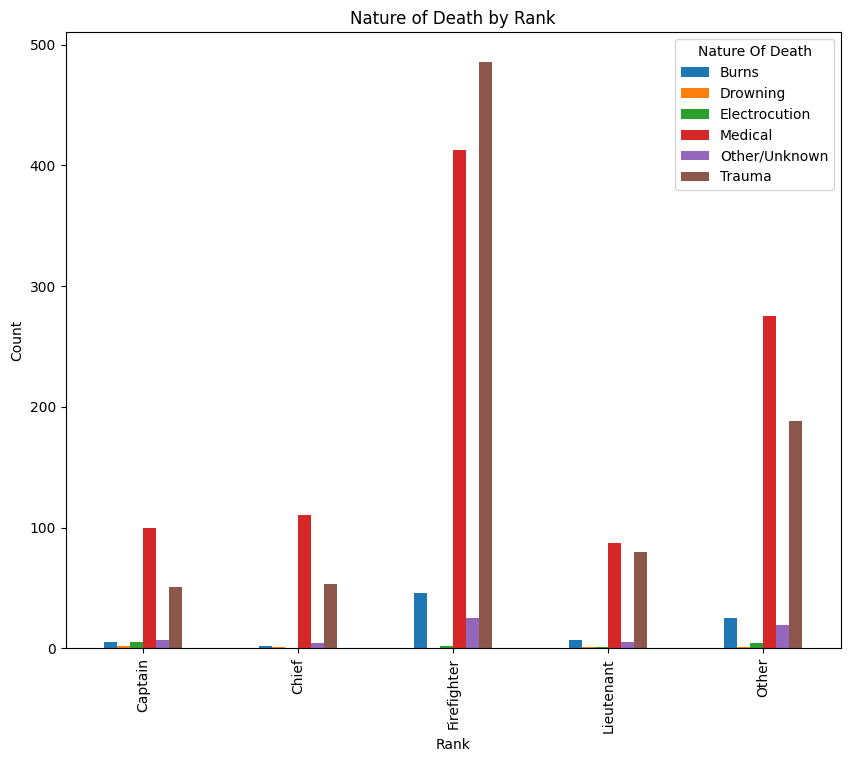

In [166]:
data.groupby(['Rank', 'Nature Of Death']).size().unstack().plot(kind='bar', figsize=(10, 8))
plt.xlabel('Rank')
plt.ylabel('Count')
plt.title('Nature of Death by Rank')
plt.show()


#From here, we can perform more in-depth analysis if we wanted to, or further tinker with our data to be more inclusive or exclusive. Thank you for reading!